In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('Balaji Fast Food Sales.csv')
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [4]:
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


- The data contains values from April 2022 to March 2023.

- The cheapest item is 20 and the most expensive item is 60 whilst the average price per item is 33.32.

- The least spent on a transaction is 20 whilst the most spent is 900. 

- The least quantity sold per transaction is 1 whilst the most quantity sold is 15.

- The average transaction amount is 204.40. The average quantity sold is 8.16 per transaction 

In [5]:
df['date'] = df['date'].str.replace('/', '-')
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.strftime('%b %Y')

In [6]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,month,year,month_year
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night,Jul,2022,Jul 2022
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,Aug,2022,Aug 2022
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,Nov,2022,Nov 2022
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,Feb,2023,Feb 2023
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,Oct,2022,Oct 2022


In [7]:
#lets inspect the rows contains null values to see if there is a pattern 

df_null = df[df['transaction_type'].isna()]
print(df_null.groupby('time_of_sale')['order_id'].count().reset_index())
print('----------------')
print(df_null.groupby('received_by')['order_id'].count().reset_index())

  time_of_sale  order_id
0    Afternoon        24
1      Evening        16
2     Midnight        22
3      Morning        22
4        Night        23
----------------
  received_by  order_id
0         Mr.        53
1        Mrs.        54


- there seems to be no particular pattern among the null values in the transaction_amount column. 
- we will treat null values as its own category thus replace the null values with 'unknown'

In [8]:
df['transaction_type'] = df['transaction_type'].fillna('Unknown')
transaction_type = df['transaction_type'].value_counts()
print(transaction_type)

transaction_type
Cash       476
Online     417
Unknown    107
Name: count, dtype: int64


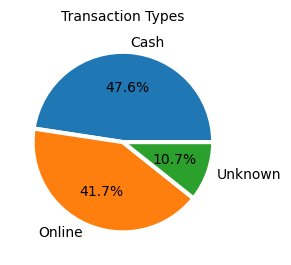

In [9]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.pie(transaction_type, labels=transaction_type.index, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax.set_title('Transaction Types', fontsize=10)
plt.tight_layout()

In [10]:
item_price = df[['item_name', 'item_price']].drop_duplicates().sort_values('item_price', ascending=False).reset_index(drop=True)
item_price

,item_name,item_price
0,Sandwich,60
1,Frankie,50
2,Cold coffee,40
3,Sugarcane juice,25
4,Aalopuri,20
5,Vadapav,20
6,Panipuri,20


In [11]:
# top performing items


items_quantity = df.groupby('item_name')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)
items_quantity


,item_name,quantity
1,Cold coffee,1361
5,Sugarcane juice,1278
3,Panipuri,1226
2,Frankie,1150
4,Sandwich,1097
0,Aalopuri,1044
6,Vadapav,1006


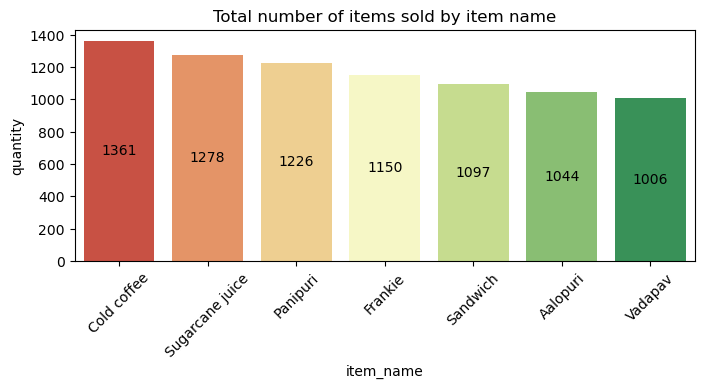

In [12]:
plt.figure(figsize=(8,3))
ax = sns.barplot(items_quantity, x='item_name', y='quantity', palette='RdYlGn')
ax.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Total number of items sold by item name')
plt.show()

In [13]:
items_quantity['revenue'] = items_quantity['quantity'] * item_price['item_price']


In [14]:
items_quantity.sort_values(by = 'revenue', ascending = False, inplace = True)
items_quantity

,item_name,quantity,revenue
1,Cold coffee,1361,68050
0,Aalopuri,1044,62640
2,Frankie,1150,46000
3,Panipuri,1226,30650
5,Sugarcane juice,1278,25560
4,Sandwich,1097,21940
6,Vadapav,1006,20120


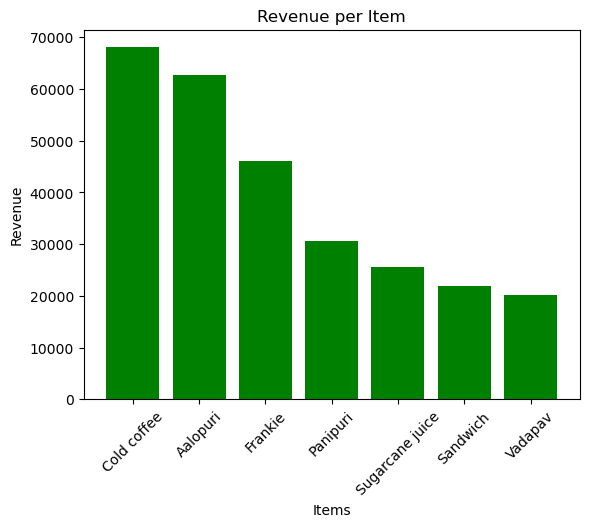

In [15]:
plt.bar(items_quantity['item_name'], items_quantity['revenue'],  color = 'green')
plt.xlabel('Items')
plt.ylabel('Revenue')
plt.title('Revenue per Item')
plt.xticks(rotation=45)
plt.show()

In [16]:
pd.pivot_table(df, columns='time_of_sale', index='item_name', values='order_id', aggfunc='count')

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
item_name,,,,,
Aalopuri,29,19,33,27,26
Cold coffee,34,30,26,32,39
Frankie,31,29,22,23,34
Panipuri,28,36,31,29,26
Sandwich,19,29,26,25,30
Sugarcane juice,41,32,28,25,27
Vadapav,23,26,33,29,23


In [17]:
items_by_time = df.groupby(['item_name', 'time_of_sale'])['order_id'].count().reset_index()
items_by_time

,item_name,time_of_sale,order_id
0,Aalopuri,Afternoon,29
1,Aalopuri,Evening,19
2,Aalopuri,Midnight,33
3,Aalopuri,Morning,27
4,Aalopuri,Night,26
5,Cold coffee,Afternoon,34
6,Cold coffee,Evening,30
7,Cold coffee,Midnight,26
8,Cold coffee,Morning,32
9,Cold coffee,Night,39


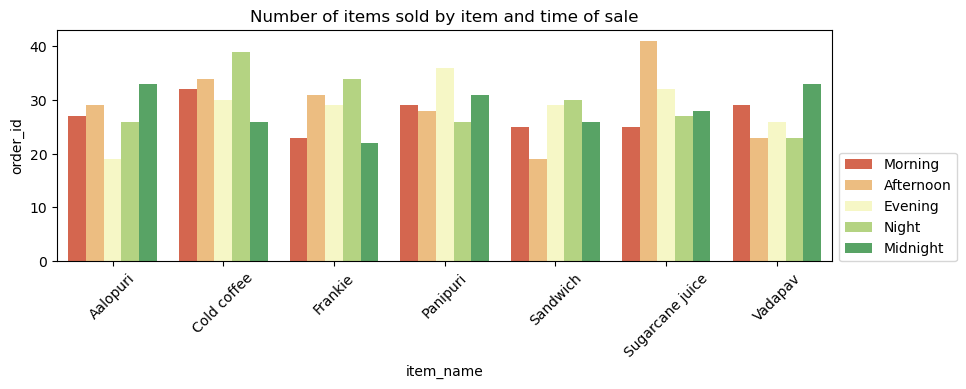

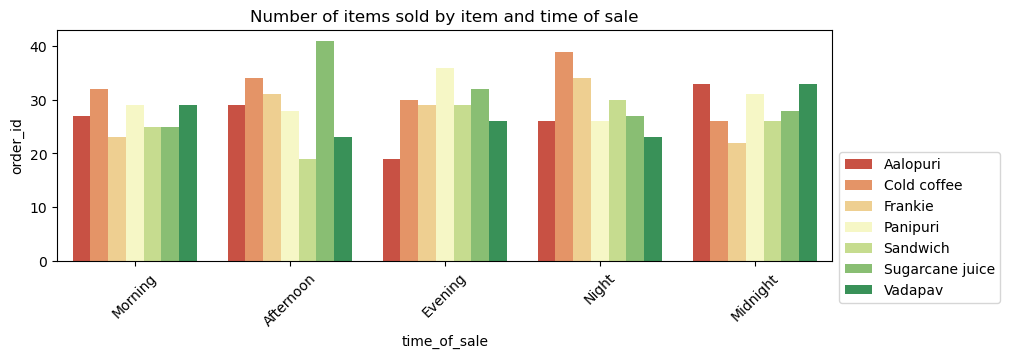

In [18]:
plt.figure(figsize=(10,3))
order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
sns.barplot(items_by_time, x='item_name', y='order_id', hue='time_of_sale',palette='RdYlGn',hue_order=order)
plt.title('Number of items sold by item and time of sale')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,3))
order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
sns.barplot(items_by_time, x='time_of_sale', y='order_id', hue='item_name',palette='RdYlGn', order=order)
plt.title('Number of items sold by item and time of sale')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

In [19]:
data = df[['item_price', 'quantity', 'transaction_amount']]
data

,item_price,quantity,transaction_amount
0,20,13,260
1,20,15,300
2,20,1,20
3,25,6,150
4,25,8,200
...,...,...,...
995,50,10,500
996,60,7,420
997,60,13,780
998,20,5,100


In [20]:
corr =data.corr()
corr

,item_price,quantity,transaction_amount
item_price,1.000000,0.050361,0.637238
quantity,0.050361,1.000000,0.731806
transaction_amount,0.637238,0.731806,1.000000


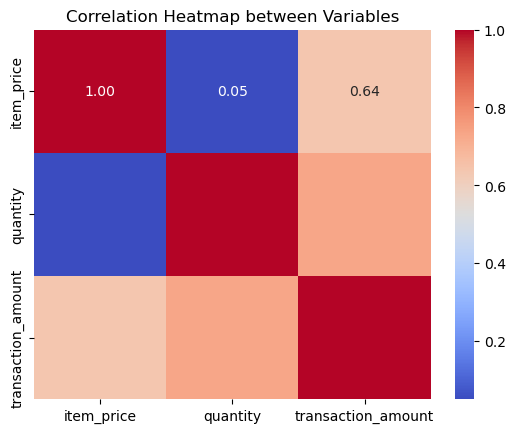

In [21]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Variables')
plt.show()

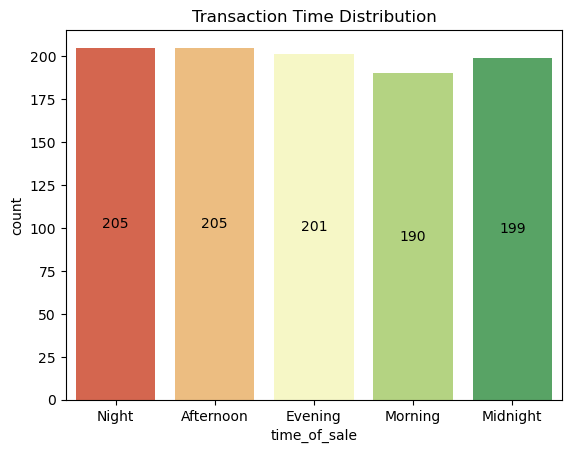

In [22]:
ax = sns.countplot(df, x='time_of_sale', palette='RdYlGn')
plt.title('Transaction Time Distribution')

ax.bar_label(ax.containers[0],label_type='center')
plt.show()

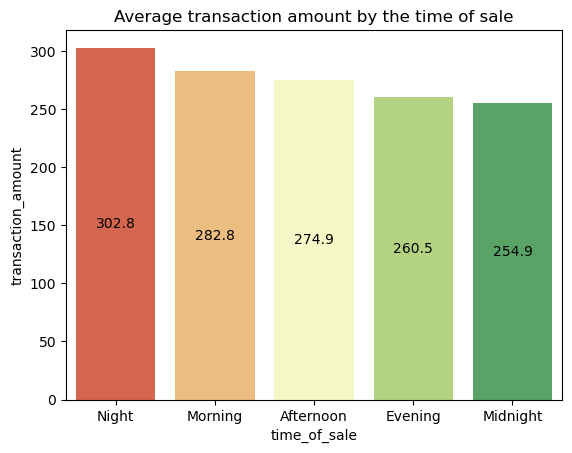

In [23]:
avg_transaction_timeofsale = df.groupby('time_of_sale')['transaction_amount'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(avg_transaction_timeofsale, x='time_of_sale', y='transaction_amount',palette='RdYlGn')
plt.title('Average transaction amount by the time of sale')

ax.bar_label(ax.containers[0],label_type='center',fmt='%.1f')
plt.show()

- Most expensive item on the menu is sandwich and its price is 60. Least expensive item on the menu is vadapav, 
aalopuri and panipuri and their price is 20.
- High performing products are cold coffee, sugarcane juice and panipuri. Low performing products are vadapav, 
aalopuri and sandwich.
- Cold coffee sales peak at night and drop the lowest at midnight.


- Time of sale analysis;
     - Most selling items in the morning are cold coffee, panipuri and vadapav.
     - Most selling items in the afternoon are sugarcane juice, cold coffee and frankie.
     - Most selling items in the evening are panipuri, sugarcane juice and cold coffee.
     - Most selling items at night are cold coffee, frankie and sandwich.
     - Most selling items at midnight are aalopuri, vadapav and panipuri.
     - The average transaction amount was higher at night compared than the other times of sale whilst at midnight it was lowest.

In [24]:
pd.pivot_table(df, columns='time_of_sale', index='transaction_type', values='order_id', aggfunc='count')

time_of_sale,Afternoon,Evening,Midnight,Morning,Night
transaction_type,,,,,
Cash,91,103,98,92,92
Online,90,82,79,76,90
Unknown,24,16,22,22,23


- There is an increase in online sales in the afternoon and at night.
- Cash transactions increased in the evening.

In [25]:
# online transactions

online_transactions = df[df['transaction_type']=='Online']
online_transactions['time_of_sale'].value_counts()

time_of_sale
Night        90
Afternoon    90
Evening      82
Midnight     79
Morning      76
Name: count, dtype: int64

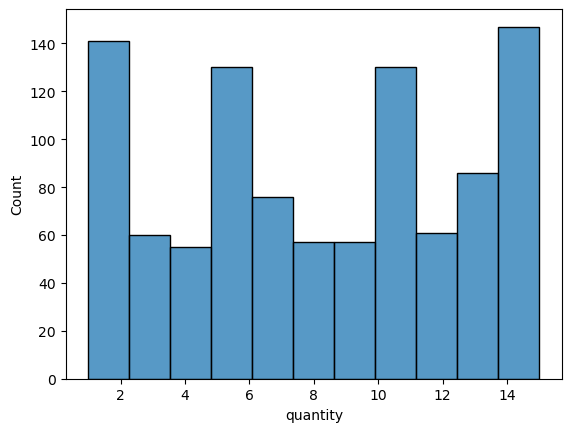

In [26]:
sns.histplot(df['quantity'])
plt.show()

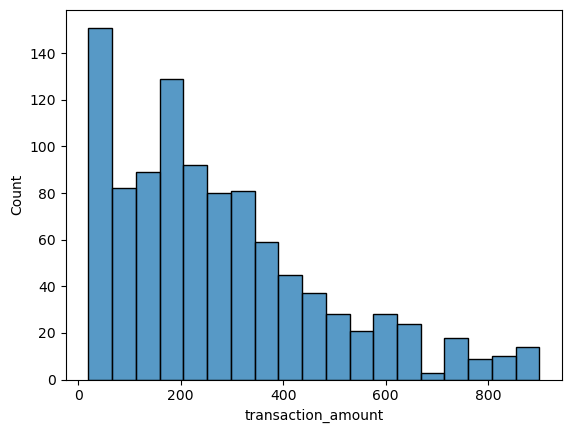

In [27]:
sns.histplot(df['transaction_amount'])
plt.show()

Model evaluation:
MAE: 1511.91
MSE: 2906718.66
RMSE: 1704.91
R²: 0.32
Model evaluation:
MAE: 1828.61
MSE: 5278562.67
RMSE: 2297.51
R²: 0.18


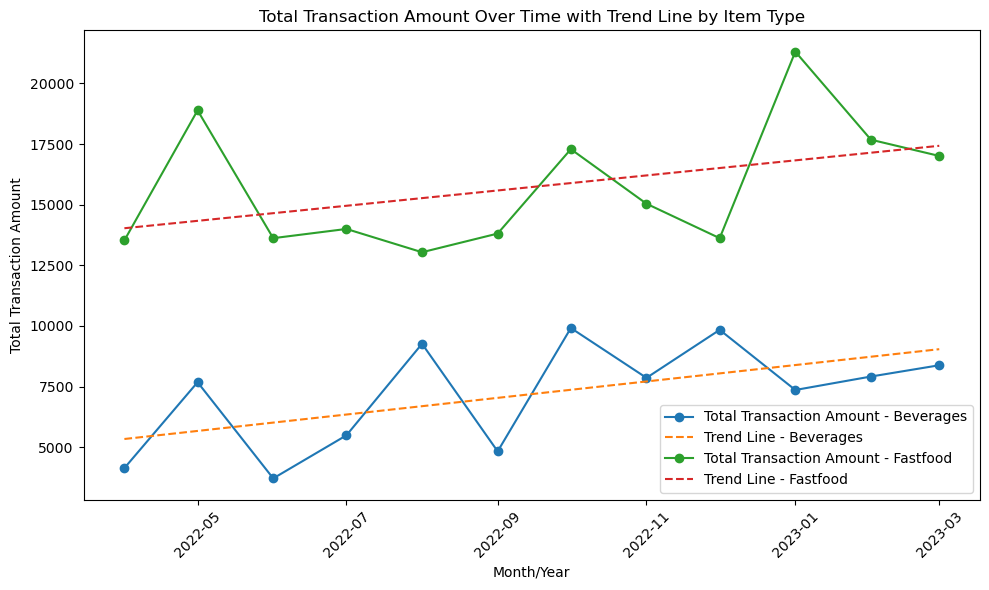

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'month_year' to datetime format
df['month_year'] = pd.to_datetime(df['month_year'])

# Group by 'month_year' and sum 'transaction_amount' for each 'item_type'
total_transaction_per_month = df.groupby(['month_year', 'item_type'])['transaction_amount'].sum().reset_index()

# Convert 'month_year' to ordinal values for regression
total_transaction_per_month['month_year_ordinal'] = total_transaction_per_month['month_year'].apply(lambda x: x.toordinal())

# Perform linear regression for each item type
plt.figure(figsize=(10, 6))

# to plot two trend lines iterate through each item type

for item_type in total_transaction_per_month['item_type'].unique():
    # Filter data for current item type
    data = total_transaction_per_month[total_transaction_per_month['item_type'] == item_type]
    
    # reshape filtered data into a 2-dimensional array ((-1, 1)), which is necessary for input to the LinearRegression model
    X = data['month_year_ordinal'].values.reshape(-1, 1)
    y = data['transaction_amount'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate MAE, MSE, RMSE, and R²
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    print(f'Model evaluation:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}')
    
    # Plot data and trend line for current item type
    plt.plot(data['month_year'], data['transaction_amount'], marker='o', linestyle='-', label=f'Total Transaction Amount - {item_type}')
    plt.plot(data['month_year'], y_pred, linestyle='--', label=f'Trend Line - {item_type}')

plt.xlabel('Month/Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount Over Time with Trend Line by Item Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model Performance:

The R² scores of 0.32 and 0.18 are relatively low, indicating that the model does not explain much of the variance in the transaction amount. This suggests that the linear relationship between the date and transaction amount might not be strong. The MAE, MSE, and RMSE values are quite high, which indicates significant prediction errors.

Possible Reasons for Poor Performance:

Non-Linearity: The relationship between month_year and transaction_amount may not be linear. Other patterns or trends might be present that a linear model cannot capture. Missing Features: Other features (e.g., seasonality, promotions, economic factors) might influence the transaction amount and are not included in the model.

## *Thank You!*

    - by Deepanshu